In [1]:
import pandas as pd

# Load the JSON file
json_file = "IMDB_250_movies.json"
data = pd.read_json(json_file)

# Convert to CSV
csv_file = "IMDB.csv"
data.to_csv(csv_file, index=False)

print(f"JSON data successfully converted to {csv_file}.")


JSON data successfully converted to IMDB.csv.


In [2]:
# Load dataset
df = pd.read_csv("IMDB.csv")

# Display basic info about the dataset
print(df.info())

# View the first few rows
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          250 non-null    object
 1   movie_rank     250 non-null    object
 2   genres         250 non-null    object
 3   release_day    250 non-null    object
 4   release_month  250 non-null    object
 5   release_year   250 non-null    object
 6   movie_length   250 non-null    object
 7   rating         250 non-null    object
 8   vote_count     250 non-null    object
 9   description    250 non-null    object
dtypes: object(10)
memory usage: 19.7+ KB
None
                          title movie_rank                          genres  \
0  ['The Shawshank Redemption']        [1]                     [['Drama']]   
1             ['The Godfather']        [2]            [['Crime', 'Drama']]   
2           ['The Dark Knight']        [3]  [['Action', 'Crime', 'Drama']]   
3     ['The Godfathe

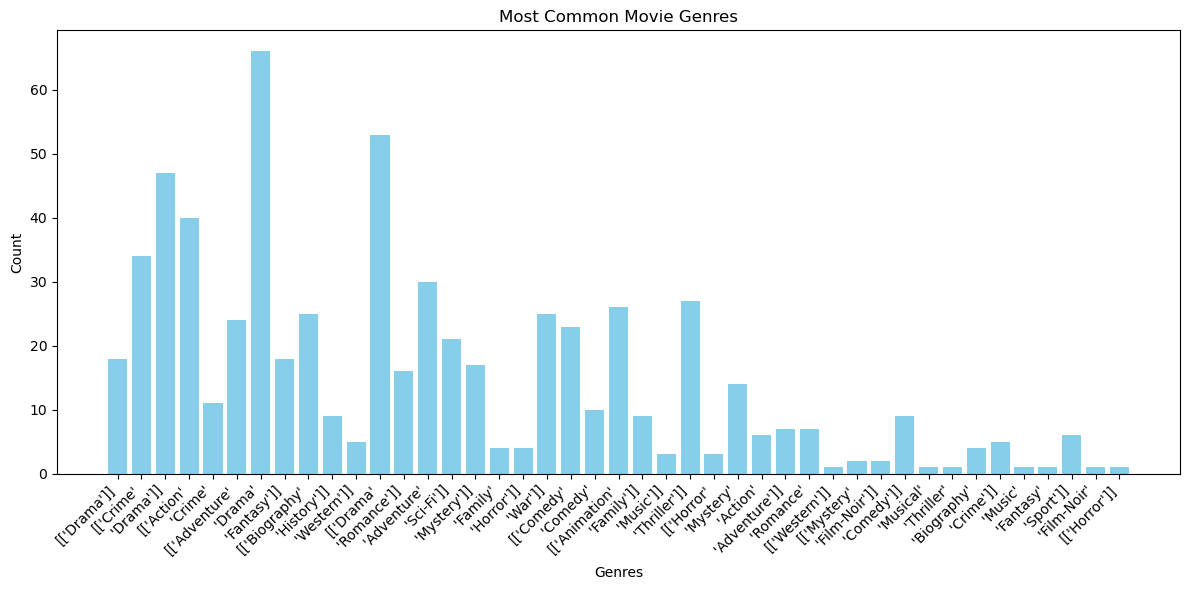

Most common genres: [(" 'Drama'", 66), ("[['Drama'", 53), (" 'Drama']]", 47), ("[['Action'", 40), ("[['Crime'", 34), (" 'Adventure'", 30), (" 'Thriller']]", 27), ("[['Animation'", 26), ("[['Biography'", 25), (" 'War']]", 25), ("[['Adventure'", 24), ("[['Comedy'", 23), (" 'Sci-Fi']]", 21), ("[['Drama']]", 18), (" 'Fantasy']]", 18), (" 'Mystery']]", 17), (" 'Romance']]", 16), (" 'Mystery'", 14), (" 'Crime'", 11), (" 'Comedy'", 10), (" 'History']]", 9), (" 'Family']]", 9), (" 'Comedy']]", 9), (" 'Adventure']]", 7), (" 'Romance'", 7), (" 'Action'", 6), (" 'Sport']]", 6), (" 'Western']]", 5), (" 'Crime']]", 5), (" 'Family'", 4), (" 'Horror']]", 4), (" 'Biography'", 4), (" 'Music']]", 3), ("[['Horror'", 3), ("[['Mystery'", 2), (" 'Film-Noir']]", 2), ("[['Western']]", 1), (" 'Musical'", 1), (" 'Thriller'", 1), (" 'Music'", 1), (" 'Fantasy'", 1), (" 'Film-Noir'", 1), ("[['Horror']]", 1)]


In [6]:
import matplotlib.pyplot as plt

# Flatten the list of genres
genre_list = df["genres"].str.replace(r"[\\[\\]']", "", regex=True).str.split(",").sum()

# Count the occurrences of each genre
genre_counts = Counter(genre_list)

# Extract genre names and their counts
genres = [genre for genre, count in genre_counts.items()]
counts = [count for genre, count in genre_counts.items()]

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(genres, counts, color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.title("Most Common Movie Genres")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Most common genres
most_common_genres = genre_counts.most_common()
print("Most common genres:", most_common_genres)

_The most common genre is Drama_

In [12]:
# Convert the "rating" column to string type first
df["rating"] = df["rating"].astype(str)

# Remove square brackets and convert to float
df["rating"] = df["rating"].str.replace(r"[\[\]]", "", regex=True).astype(float)

# Calculate the average IMDb rating
average_rating = df["rating"].mean()
print(f"Average IMDB Rating: {average_rating:.2f}")


Average IMDB Rating: 8.31


_The Average IMDB rating is 8.31_

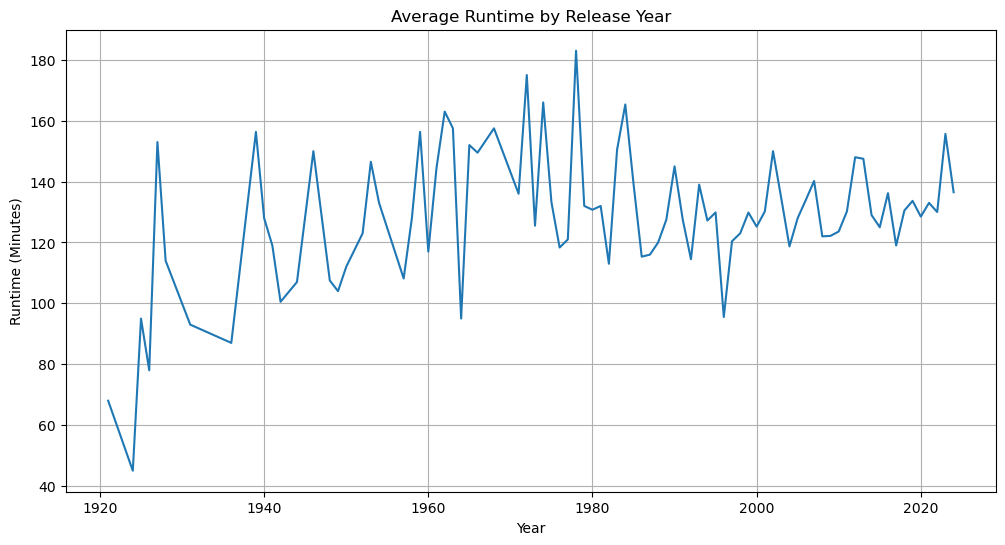

In [14]:
# Clean the "release_year" column by removing square brackets
df["release_year"] = df["release_year"].str.replace(r"[\[\]]", "", regex=True).astype(int)

# Convert runtime to minutes
df["runtime_minutes"] = df["movie_length"].str.split(":").apply(lambda x: int(x[0]) * 60 + int(x[1]))

# Calculate average runtime by release year
avg_runtime_per_year = df.groupby("release_year")["runtime_minutes"].mean()

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
avg_runtime_per_year.plot(kind="line", title="Average Runtime by Release Year", xlabel="Year", ylabel="Runtime (Minutes)")
plt.grid()
plt.show()


# Trends in Average Movie Runtimes

Movies have changed dramatically over the years, and the trends in runtimes show how storytelling and audience preferences have evolved.

## Key Observations:
- **1920s to 1930s**:
  - Movies were short, usually about an hour long. Back then, filmmaking technology was basic, and stories were kept simple.
  
- **1940s to 1980s**:
  - Gradually, runtimes increased as filmmakers explored more complex narratives and genres like epics and musicals. 

- **1990s to Today**:
  - Modern movies are streamlined, averaging around 100-140 minutes. Streaming services and shorter attention spans have encouraged filmmakers to strike a balance between detail and engagement.

## Factors Shaping Runtimes:
- **Genre**: Big epics and dramas are longer, while animations and comedies are shorter.
- **Technology**: Better filmmaking tools allowed for richer storytelling over time.
- **Audiences**: Today, movies are designed to keep viewers entertained without feeling too long.

 



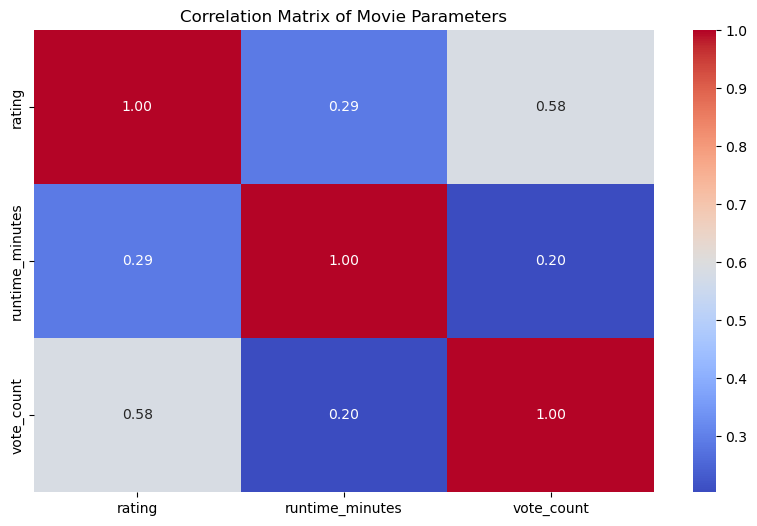

In [16]:
# Clean the "vote_count" column by removing square brackets
df["vote_count"] = df["vote_count"].str.replace(r"[\[\]]", "", regex=True).astype(float)

# Convert runtime to minutes
df["runtime_minutes"] = df["movie_length"].str.split(":").apply(lambda x: int(x[0]) * 60 + int(x[1]))

# Calculate correlation matrix
correlation_matrix = df[["rating", "runtime_minutes", "vote_count"]].corr()

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Movie Parameters")
plt.show()


_The 'vote-count' parameter has the highest correlation with the IMDb rating_